# TITANIC SURVIVAL PREDICTION PROBLEM

In this notebook, I will use machine learning tools to solve Titanic survival prediction problem. 

The goal is to build a predictive model based on information in the given training dataset to guess the survival of the passenger on the test dataset. This is a classficication problem, thus I will use machine learning algorithm best suited to solve classfication problem.

Since the question is already been defined, the workflow I will use are stated as following : 
1. Data Understanding
2. Data Preprocessing 
3. Exploratory Data Analysis (EDA)
4. Feature Selection & Engineering
5. Fit & Train Machine Learning Models 
6. Model Evaluation & Selection 
7. Result Submission

*But keep in mind that this workflow is only to give a general sense of direction, I might jump between steps if it's necessary since the process is iterative and closed-cycle.


In [1]:
#import libraries

#data analysis & preprocessing
import pandas as pd
import numpy as np 

#visualization tools 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data Understanding 

Understanding the dataset is crucial first step in data science process because we can take a look at the dataset, determine its quality before we move into preprocessing.

In [2]:
#import the training and test dataset to panda dataframe
titanic_train = pd.read_csv("train.csv") 
titanic_test = pd.read_csv("test.csv")

#concatenate training and test dataset  into one dataframe
dataset = pd.concat([titanic_train, titanic_test])

#display first 5 rows of training and test dataset 
display(titanic_train.head())
display(titanic_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




Here we take a look at first 5 rows of the training dataset. It contains information about each passenger for each rows and different variable for each columns. We can group the variables :

Numerical

- Continuous : Age, Fare
- Discrete : SibSp, Parch

Categorical

- Ordinal : Pclass
- Nominal : PassengerId, Survived, Name, Sex, Ticket, Cabin, Embarked



From those columns, notice that some value are missing in the cabin columns. So we investigate further for the missing value in the dataset.



In [3]:
#overall description of dataframes, scanning for missing value 

display(titanic_train.info())
display(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

The training dataset comprises 891 rows and 12 columns, but there are missing data in age, cabin and embarked column. Meanwhile the test dataset also contain missing value in age, fare and cabin column.

Before we jump into handling the missing data, let's take a look on the overall statistics of each variable.

In [4]:
#overall view of the statistic of the variable

display(titanic_train.describe(include='all'))
display(titanic_test.describe(include='all'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sunderland, Mr. Victor Francis",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


We can observe some interesting insights such as : 
- The survival rate of passenger from training dataset is 38.38% 
- Majority of the passenger is male (843 out of 1309)
- Age contains several missing values in both training and test dataset, with a relative big standard variation.
- Cabin have a lot of missing values with only 295 out of 1309 data points, therefore the data is not complete and we might drop the whole column since it can't be considered as a feature in our predictive model.
- 1 missing value on fare column in test dataset.
- Embarked has just 2 missing values, we can fill the missing value with the most frequent data 'S'

## Data Preprocessing 

The missing data need to be addressed before we fit and train the data to the machine learning algorithm since it may impair the quality of the prediction.

This is an exciting steps since we can build some hypothesis on how to best fill the missing data since there are no the 'right' way to do it. For example, I'm going to take a look at the relation between Pclass, Sex and Age to fill the missing value for age.

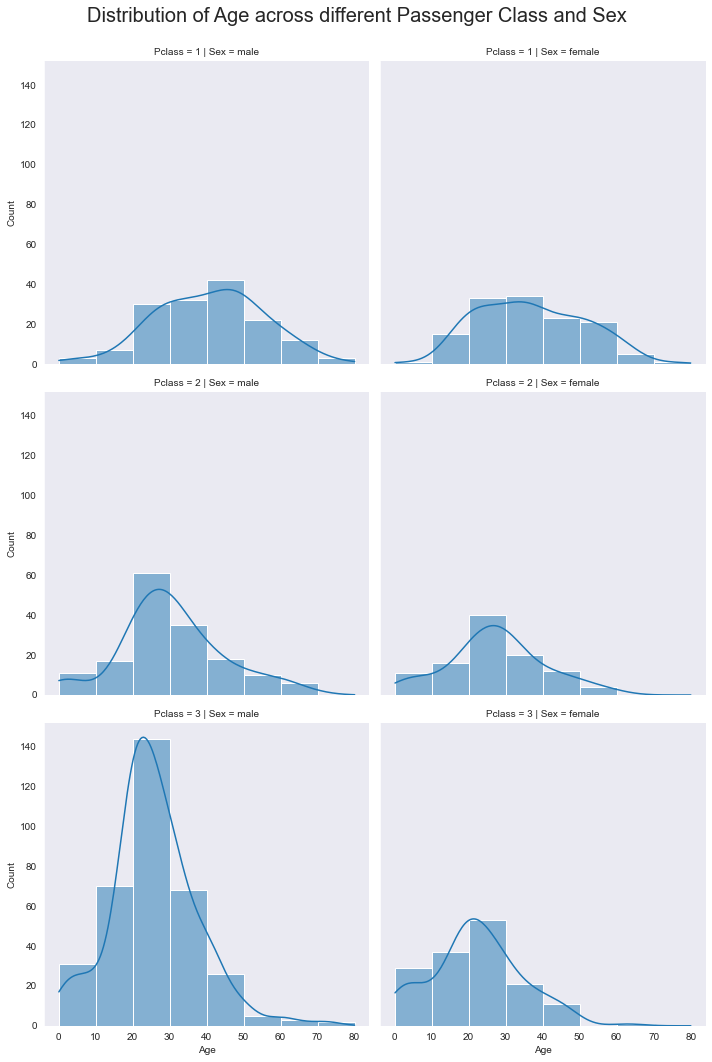

In [5]:
#subset new dataframe to observe the relation between Passenger Class, Sex and Age.

data_age_pclass_sex = dataset[['Pclass','Sex','Age']]

#visualizing the distribution of age across Passenger Class and Sex
sns.set_style('dark')

plot = sns.displot(data=data_age_pclass_sex, x='Age', col='Sex',row='Pclass', kde=True, bins=8)
plot.fig.suptitle("Distribution of Age across different Passenger Class and Sex", fontsize=20)
plot.fig.subplots_adjust(top=0.93)

In [6]:
#Calculate the median age for each Passenger class and sex group

fill_age_median = pd.DataFrame(data_age_pclass_sex.groupby(['Pclass','Sex'], as_index=False)['Age'].median())
fill_age_median

,Pclass,Sex,Age
0,1,female,36.0
1,1,male,42.0
2,2,female,28.0
3,2,male,29.5
4,3,female,22.0
5,3,male,25.0


We saw different type of distribution and median across age and passenger class, therefore we need to fill the missing age value accordingly.


Note that we use the age median value from the combination of both training and test since it contains missing value in both dataframes, so it makes more sense to consider the whole dataset

In [7]:
#fill missing value according to Passenger class and Sex 

print('For Training Dataset')
print('Before, there are ' + str(titanic_train['Age'].isnull().sum()) + ' missing values in "Age" column')

#fill missing value 
for pclass in fill_age_median['Pclass'].unique():
    for sex in fill_age_median['Sex'].unique():
        titanic_train.loc[(titanic_train['Pclass']==pclass)&(titanic_train['Sex']==str(sex))&(titanic_train['Age'].isnull()==True), 'Age'] \
        = float(fill_age_median.loc[(fill_age_median['Pclass']==pclass)&(fill_age_median['Sex']==str(sex))]['Age'])
  
print('After we fill it, now there are ' + str(titanic_train['Age'].isnull().sum()) + ' missing values in "Age" column')

print('-'*75)

print('For Test Dataset')
print('Before, there are ' + str(titanic_test['Age'].isnull().sum()) + ' missing values in "Age" column')

#fill missing value 
for pclass in fill_age_median['Pclass'].unique():
    for sex in fill_age_median['Sex'].unique():
        titanic_test.loc[(titanic_test['Pclass']==pclass)&(titanic_test['Sex']==str(sex))&(titanic_test['Age'].isnull()==True), 'Age'] \
        = float(fill_age_median.loc[(fill_age_median['Pclass']==pclass)&(fill_age_median['Sex']==str(sex))]['Age'])
  
print('After we fill it, now there are ' + str(titanic_test['Age'].isnull().sum()) + ' missing values in "Age" column')



For Training Dataset
Before, there are 177 missing values in "Age" column
After we fill it, now there are 0 missing values in "Age" column
---------------------------------------------------------------------------
For Test Dataset
Before, there are 86 missing values in "Age" column
After we fill it, now there are 0 missing values in "Age" column


One down ! We move on to the next variable, "Embarked". Let's take a look at the data with missing value 

In [8]:
#Check the missing value in the 'Embarked' column

titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
#fill the missing value with the most frequent data point aka mode

titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0],inplace=True)

assert titanic_train['Embarked'].isnull().sum() == 0 #truth assertion to check if the missing value had been filled

We still have 1 missing value from Fare column in test dataset. Common sense tells us that fare are decided by Passenger class and embarkation port. 

In [12]:
dataset[dataset['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Since there is only one missing value, we will observe the fare value that match the passenger class and embarkation port profile of the missing data point (Pclass = 3 and Embarked = 'S')

In [13]:
#subset new dataframe to observe the relation between Fare vs Passenger Class and Embarkation Port 

data_fare_pclass_embarked = dataset[['Fare','Pclass','Embarked']]
fare_data = data_fare_pclass_embarked[(dataset['Pclass']==3)&(dataset['Embarked']=='S')]['Fare']
fare_data.describe()

count    494.000000
mean      14.435422
std       13.118281
min        0.000000
25%        7.854200
50%        8.050000
75%       15.900000
max       69.550000
Name: Fare, dtype: float64

Since the standard deviation in that particular category of Passenger Class and Embarkation Port is almost 100% of mean value, it is more suitable to use median value instead of mean value.

In [16]:
#Fill Fare missing value with median 

titanic_test['Fare'].fillna(fare_data.median(), inplace = True)

assert titanic_train['Fare'].isnull().sum() == 0 #truth assertion to check if the missing value had been filled

Now the "Cabin" column should be the last column that contains missing value

So we drop the "Cabin" column as it contains incomplete data

In [17]:
#drop the "Cabin" column

print('For Training Dataset')
print('The shape of dataset before we drop the "Cabin" column is ' + str(titanic_train.shape))
titanic_train.dropna(axis='columns',inplace=True)
print('The shape of dataset after we drop the "Cabin" column is ' + str(titanic_train.shape))

print('-'*75)

print('For Test Dataset')
print('The shape of dataset before we drop the "Cabin" column is ' + str(titanic_test.shape))
titanic_test.dropna(axis='columns',inplace=True)
print('The shape of dataset after we drop the "Cabin" column is ' + str(titanic_test.shape))


For Training Dataset
The shape of dataset before we drop the "Cabin" column is (891, 12)
The shape of dataset after we drop the "Cabin" column is (891, 11)
---------------------------------------------------------------------------
For Test Dataset
The shape of dataset before we drop the "Cabin" column is (418, 11)
The shape of dataset after we drop the "Cabin" column is (418, 10)


We check the dataset one more time to make sure that the dataset is ready to be used

In [18]:
display(titanic_train.info())
display(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


None

We can see that there's no more missing data in the training dataset and all the datatype is as expected, it's time to proceed to the next stage.

## Exploratory Data Analysis (EDA)

In Exploratory Data Analysis, I'm going to explore deeper into the dataset and find the relation between feature and desired outcome. We also can formulate some preliminary hipothesis, investigate and proof/modify it through our exploration. Preliminary hypothesis is not mandatory but could be useful for Data Scientist in the beginning of EDA.

For example, my preliminary hypotheses are : 
- Women and Children could have higher possibility to survive since they are usually prioritized in the rescue process
- Higher passenger class could have higher possibility to survive  
- Higher ticket fare could lead to higher chance of survival
- Number of sibling/spouse and parent/child on board could have some relation with the survival of passenger
- Embarkation port does not have relation toward survival 

*Note that the hypothesis could alter as we make discovery through EDA

,Sex,Survived
0,female,0.742038
1,male,0.188908


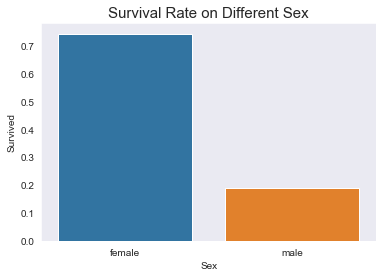

In [19]:
#investigate the survival rate of different Sex 

sex_surv = titanic_train[['Sex','Survived']].groupby('Sex', as_index=False).mean()
display(sex_surv)

sns.barplot(data=sex_surv, x='Sex', y='Survived')
plt.title('Survival Rate on Different Sex', fontsize=15)
plt.show()

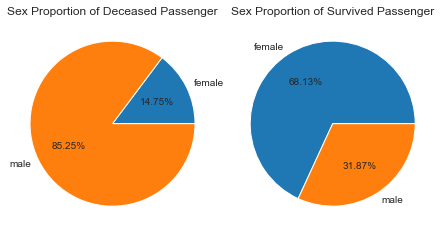

In [20]:
#using pie chart to visualized the percentage of survival on different sex

pie_0 = titanic_train[['Sex','Survived']][titanic_train['Survived']==0].value_counts(subset='Sex').reset_index()
pie_0 = pd.DataFrame(pie_0).rename(columns={0:'Counts'})
pie_0.sort_values('Sex', ascending=True, inplace=True)

pie_1 = titanic_train[['Sex','Survived']][titanic_train['Survived']==1].value_counts(subset='Sex').reset_index()
pie_1 = pd.DataFrame(pie_1).rename(columns={0:'Counts'})
pie_1.sort_values('Sex', ascending=True, inplace=True)


#create subplots for pie chart

fig, ax = plt.subplots(1,2)

# plot pie chart for survived = 0
ax[0].pie(pie_0['Counts'], labels=pie_0['Sex'],autopct='%0.2f%%', shadow=False)
ax[0].title.set_text('Sex Proportion of Deceased Passenger')

# plot pie chart for survived = 1
ax[1].pie(pie_1['Counts'], labels=pie_1['Sex'],autopct='%0.2f%%', shadow=False)
ax[1].title.set_text('Sex Proportion of Survived Passenger')

fig.tight_layout(pad=0.0)
plt.show()

From the visualization above, we can observe that 'Sex' can be one of the important features in our predictive model as it has quite distinct result over its variants.

Next we observe the distribution of age and survivability

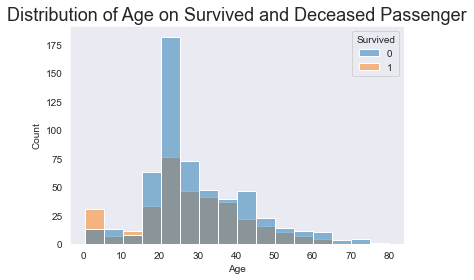

In [21]:
#Observe distribution of age and survavibility

age_surv = titanic_train[['Age','Survived']]

plt.title("Distribution of Age on Survived and Deceased Passenger", fontsize=18)
plot = sns.histplot(data=age_surv, x='Age', hue='Survived', bins=16, alpha=0.5)

In [23]:
#calculating the survival rate of passenger below 15 years 

print('Survival Rate of Passenger below 15 years is ' + str(age_surv[age_surv['Age']<=15]['Survived'].mean()) )
print('Survival Rate of Passenger above 15 years is ' + str(age_surv[age_surv['Age']>15]['Survived'].mean()) )

Survival Rate of Passenger below 15 years is 0.5903614457831325
Survival Rate of Passenger above 15 years is 0.3626237623762376


We can observe from the visualisation above that passenger below 15 years have better survival chance than those above. This information might be useful for feature engineering. 

The two visualization above also confirms the hypothesis that Woman and Children have high survival rate.

There are no other general trend for age apart from the explanation above, so we may use it to generate feature and the drop the age column completely.

Next, we will see the survival chance of different passenger classes

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


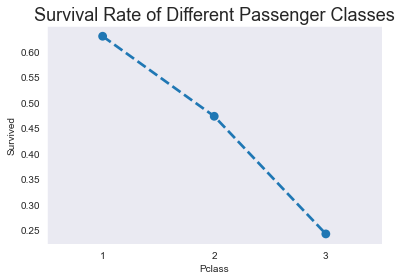

In [24]:
#Observe distribution of age & pclass vs survavibility

pclass_surv = titanic_train[['Pclass','Survived']].groupby('Pclass', as_index=False).mean()
display(pclass_surv)

#Point plot to visualize survival rate among different passenger classes 
plt.title("Survival Rate of Different Passenger Classes", fontsize=18)
plot = sns.pointplot(data=pclass_surv, x='Pclass', y='Survived', ci='sd', linestyles='--')

We can see that as Passenger Class increases, the survivability rate decreases, confirming our hypothesis that Passenger Class can be a useful feature in predicting the survivability of passenger.

Next on, let's check on the factor of Fare on survivability of the passenger. As I have assumed before that fare price is affected by Passenger Class and Embarkation Port, I will examine the Fare distribution of survived and deceased passenger based on their passenger class and embarkation port.

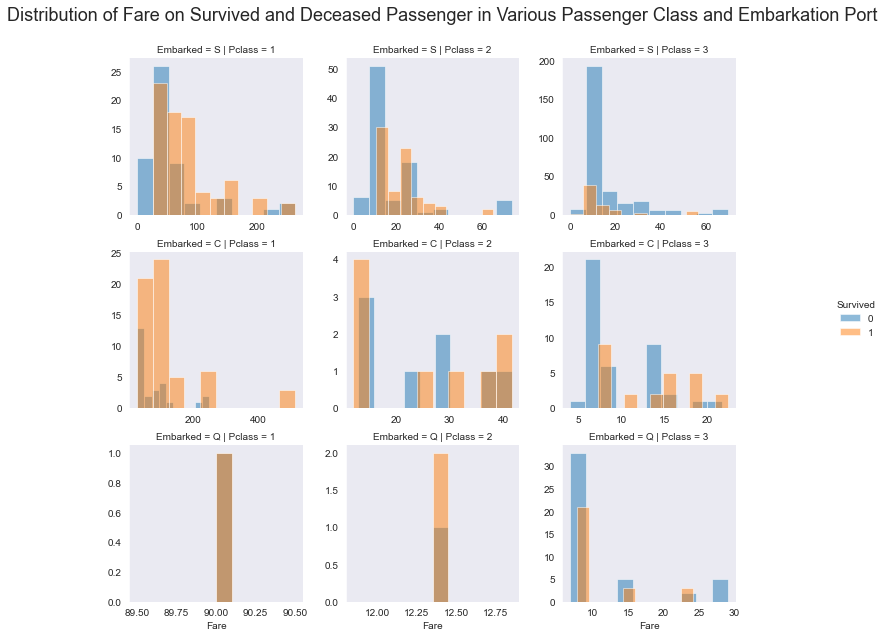

In [33]:
#Observe distribution of fare and survavibility

fare_pclass_embarked_surv = titanic_train[['Fare','Survived','Pclass','Embarked']]

grid = sns.FacetGrid(fare_pclass_embarked_surv, row='Embarked', col='Pclass', hue='Survived', sharex=False, sharey=False)
grid.map(plt.hist, 'Fare', alpha=0.5, bins=10)
grid.fig.suptitle("Distribution of Fare on Survived and Deceased Passenger in Various Passenger Class and Embarkation Port", fontsize=18)
grid.fig.subplots_adjust(top=0.9)
grid.add_legend()

There are several observation from the figure above : 
- In passenger class 1, generally we can say that higher fare price result on better survival chance except for embarkation port Queenstown where too little sample to generate meaningful conclusion.
- For passenger class 2 and 3, the pattern are random as we observe some of the highest paying passenger did not survived.
- Most of the deceased passenger is coming from bottom 10% fare price of each passenger class and embarkation port. We should investigate this by calculating the survival rate of bottom 10% and top 90%.

In [106]:
df = fare_pclass_embarked_surv

for embarked in set(df['Embarked']):
    for pclass in set(df['Pclass']):
    
        print('For Pclass = ' + str(pclass) + ' & Embarked = ' + str(embarked))
        value = df[(df['Embarked']==embarked)&(df['Pclass']==pclass)]['Fare'].quantile(0.10)
        
        print('10% quantile Fare is ' + str(value))
        
        print('Survival Rate for Bottom 10% Fare Price is ' + \
        str( df[(df['Embarked']==embarked)&(df['Pclass']==pclass)&(df['Fare']<value)]['Survived'].mean() ) )
        
        print('Survival Rate for Top 90% Fare Price is ' + \
        str( df[(df['Embarked']==embarked)&(df['Pclass']==pclass)&(df['Fare']>=value)]['Survived'].mean() ) )
        
        print(' ')

For Pclass = 1 & Embarked = Q
10% quantile Fare is 90.0
Survival Rate for Bottom 10% Fare Price is nan
Survival Rate for Top 90% Fare Price is 0.5
 
For Pclass = 2 & Embarked = Q
10% quantile Fare is 12.350000000000001
Survival Rate for Bottom 10% Fare Price is 0.6666666666666666
Survival Rate for Top 90% Fare Price is nan
 
For Pclass = 3 & Embarked = Q
10% quantile Fare is 7.7333
Survival Rate for Bottom 10% Fare Price is 0.0
Survival Rate for Top 90% Fare Price is 0.4153846153846154
 
For Pclass = 1 & Embarked = C
10% quantile Fare is 29.7
Survival Rate for Bottom 10% Fare Price is 0.2857142857142857
Survival Rate for Top 90% Fare Price is 0.7307692307692307
 
For Pclass = 2 & Embarked = C
10% quantile Fare is 13.42502
Survival Rate for Bottom 10% Fare Price is 0.5
Survival Rate for Top 90% Fare Price is 0.5333333333333333
 
For Pclass = 3 & Embarked = C
10% quantile Fare is 7.225
Survival Rate for Bottom 10% Fare Price is 0.0
Survival Rate for Top 90% Fare Price is 0.390625
 
For P

From the calculation above, we saw that generally the top 90% has better survival probability than the bottom 10% except the anomalies in passenger class 2 from embarkation port Cherbourg and Queenstown which may be caused by lack of sufficient amount of data.

The separation by 10% quantile fare made huge different on the survival rate, with some of the bottom 10% even have 0% survival rate. This information is essential and definitely should be considered as one of the feature in the predictive model.

So I will rectify my initial hypothesis which is "Higher ticket fare could lead to higher chance of survival" to "Very low ticket fare correlate to very low chance of survival" because based on the visualisation, higher ticket fare does not necessarily mean higher chance of survival.